## Dacon_final Pre-Processing / 유경
- cvl의 한영오빠가 전에 좀 전처리해 놓은 모델을 가지고 제가 조금 수정 및 설명해 놓았습니다..!
- 사실 코드가.. 정교하진 않고요..ㅎ.... 도움이 그래도 됐으면 ...
<br></br>
- 안써도 될 것 같은 부분은 임의로 주석처리를 해놨습니다만, 주석 풀고 써도 됩니다!
- 한영오빠가 구글 코랩을 기반으로 작성을 해놓았습니다. 근데 저는 주피터노트북으로 진행중입니다 ㅎ
- 한영오빠.. 빌려줘서 고마워..

### Abstract..
`opencv`의 `thresholding` 기법을 사용했습니다. (몇줄 안돼요..ㅎ 사실..성능이 좋은지는 모르겠습니다ㅜ)
> <b>`이미지 이진화`를 진행해 유의미한 부분을 찾아내도록 만든 모델입니다.</b>  
예시는 아래와 같습니다
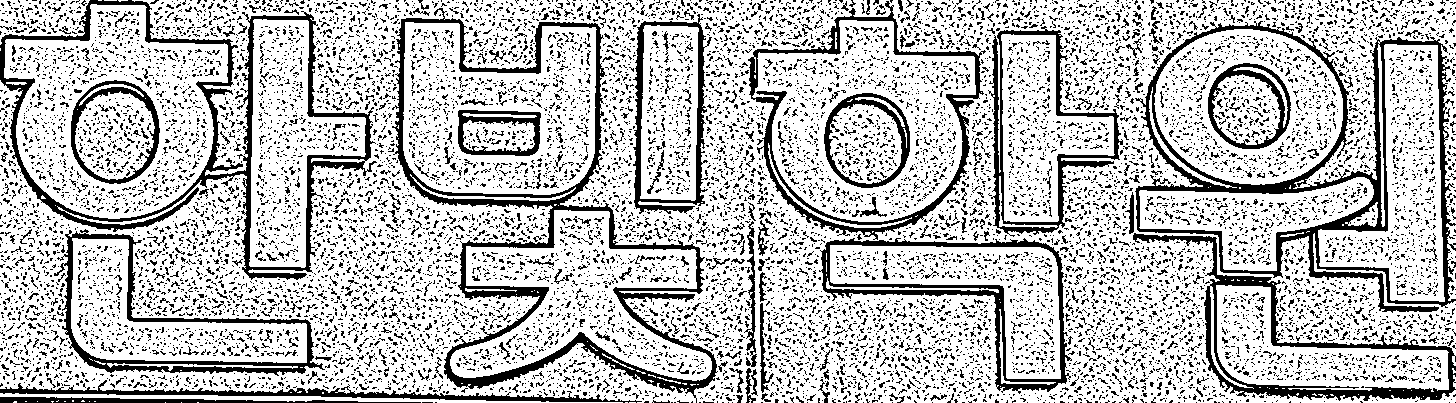
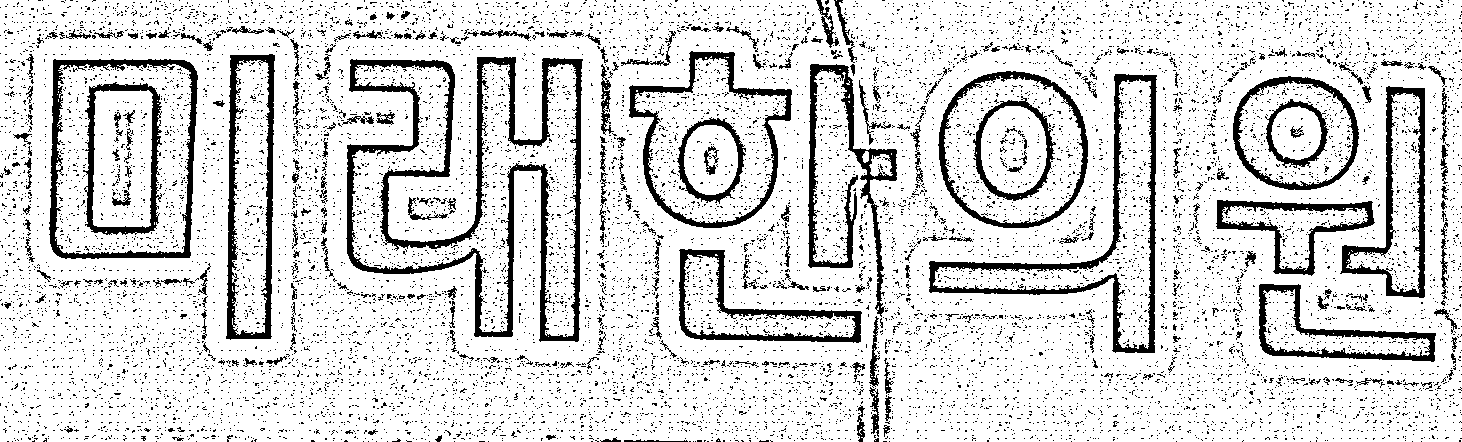
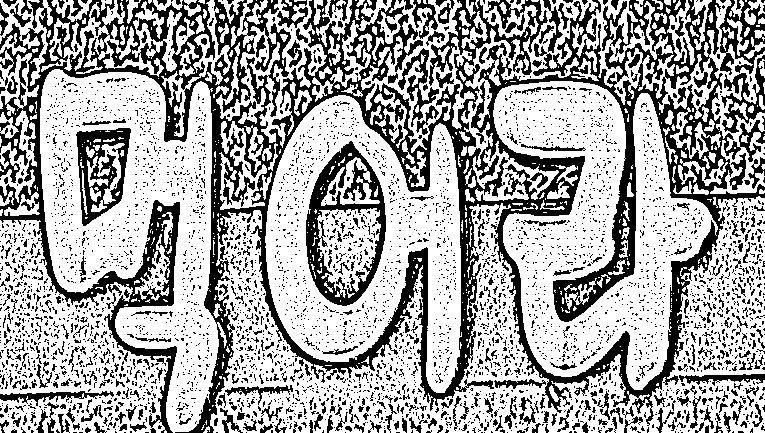

## *주석 처리된 부분은 SKIP 하셔도 됩니다.*
#### 알다시피 그냥 구글 코랩 마운트 부분입니다.

In [1]:
# from google.colab import drive
# drive.mount('contents/')

In [2]:
# %cd /content/contents/MyDrive/dacon/123

### 아래 주석된 부분은 미리 학습된 OCR 모델 깃클론 해 놓은 부분입니다.
- 다만.. 한글이 한 글자씩 학습되어 있는 모델입니다. 
- 잘쓰면 input으로 한 글자씩 넣어서 돌려도 될 것같지만.. 제 생각상 유의미한 부분은 아닐 듯 싶습니다(때문에 주석처리 해놓음)
- 시간이 꽤 들 수도..
- 밑 부분은 여러가지 필요한 환경설정 부분입니다.

In [3]:
# !git clone https://github.com/krenerd/KoOCR-tensorflow.git

In [4]:
# %cd KoOCR-tensorflow

In [5]:
# !pip install progressbar2
# !pip install  googledrivedownloader

In [6]:
# !pip install py7zr

In [7]:
# !python load_data.py --sevenzip=False

In [8]:
# !python crawl_data.py   --AIHub=true --clova=true --image_size=96 --x_offset=8 --y_offset=8 --char_size=80  

In [9]:
# !pip install wandb

In [10]:
# !pip install keras_adabound

In [11]:
# import cv2

In [12]:
# from google.colab.patches import cv2_imshow

In [13]:
# cv2_imshow(image)

In [14]:
# import tensorflow as tf


In [15]:
# tf.io.read_file

In [16]:
# import numpy as np

In [17]:
# image = np.squeeze(image)


In [18]:
# import model
# OCR_model=model.KoOCR(weight_path='pretrained/plain_melnyk/.', split_components=True)

# OCR_model.model.summary()
# # OCR_model.train(epochs=10, lr=0.01)

# # pred=OCR_model.predict(image)

In [19]:
#pred

In [20]:
#!nvidia-smi

## 여기서부터 보면 됩니다~

In [21]:
pip install opencv-python  #cv2 사용

You should consider upgrading via the '/Users/youkyoung-na/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2
import numpy as np
import pandas as pd

In [4]:
# 자신의 컴퓨터에 맞게 경로지정 해주시면 됩니다.
train = pd.read_csv('../contents/open/train.csv')
test = pd.read_csv('../contents/open/test.csv')

In [5]:
train_path=train['img_path']
test_path=test['img_path']


In [6]:
train_path = np.array(train_path)
train_path = list(train_path)
train_path

test_path = np.array(test_path)
test_path = list(test_path)
test_path

['./test/test_00001.png',
 './test/test_00002.png',
 './test/test_00003.png',
 './test/test_00004.png',
 './test/test_00005.png',
 './test/test_00006.png',
 './test/test_00007.png',
 './test/test_00008.png',
 './test/test_00009.png',
 './test/test_00010.png',
 './test/test_00011.png',
 './test/test_00012.png',
 './test/test_00013.png',
 './test/test_00014.png',
 './test/test_00015.png',
 './test/test_00016.png',
 './test/test_00017.png',
 './test/test_00018.png',
 './test/test_00019.png',
 './test/test_00020.png',
 './test/test_00021.png',
 './test/test_00022.png',
 './test/test_00023.png',
 './test/test_00024.png',
 './test/test_00025.png',
 './test/test_00026.png',
 './test/test_00027.png',
 './test/test_00028.png',
 './test/test_00029.png',
 './test/test_00030.png',
 './test/test_00031.png',
 './test/test_00032.png',
 './test/test_00033.png',
 './test/test_00034.png',
 './test/test_00035.png',
 './test/test_00036.png',
 './test/test_00037.png',
 './test/test_00038.png',
 './test/tes

In [26]:
# img

## 코드 ..ㅎ
### preprocessing image for OCR(ver.02 adaptive threshold with gaussian C )

In [8]:

for i in train_path:
  img_path =  '../contents/open/'+i
  img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  h,w = img.shape # 32 100 맞춘다 대강 1:3
  th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,15,2)
  # new_img = cv2.copyMakeBorder(img, int(2000-(h/2)), int(2000-(h/2)), int(2000-(w/2)), int(2000-(w/2)), cv2.BORDER_CONSTANT, value=[255, 255, 255])
  #cv2.imshow('1', th3)
  cv2.imwrite(f'../contents/open/pretrain3/{i}', th3)
  
  print(i)

NameError: name 'cv2_imshow' is not defined

사실.. 별건 없습니다.. 도움이 조금이라도 되길..